In [1]:
data <- read.csv("C:/Users/radha31/Downloads/Marks.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	100 obs. of  3 variables:
 $ exam_1  : num  34.6 30.3 35.8 60.2 79 ...
 $ exam_2  : num  78 43.9 72.9 86.3 75.3 ...
 $ admitted: int  0 0 0 1 1 0 1 1 1 1 ...
NULL


In [21]:
fit = glm(admitted ~ exam_1, data=data, family=binomial)


newdat <- data.frame(
    exam_1=seq(min(data$exam_1), max(data$exam_1),
    
               len=100))

#newdat


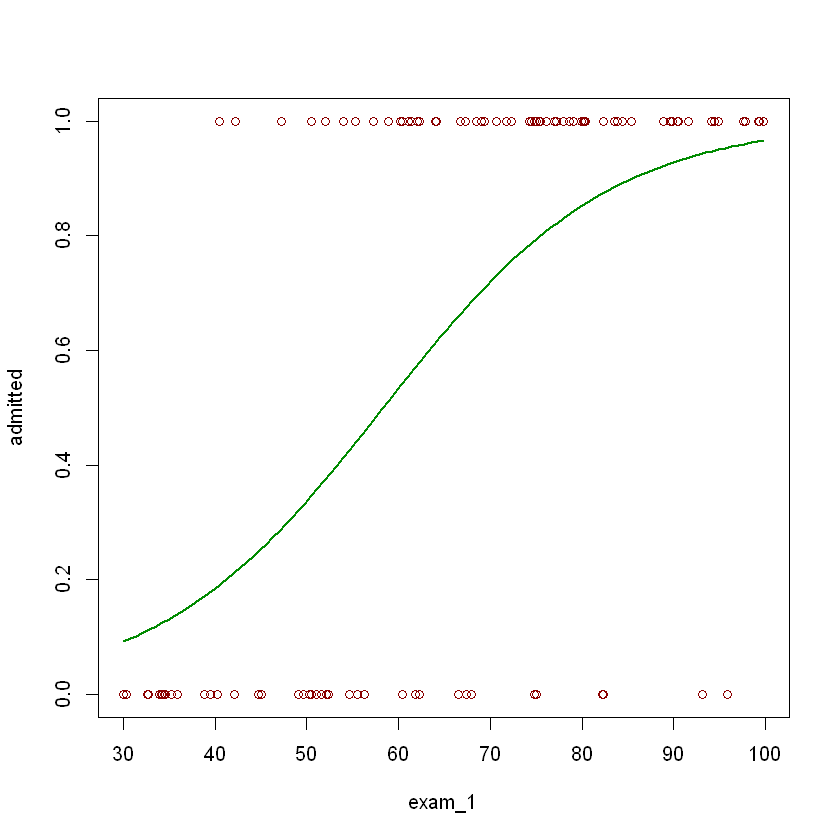

In [17]:
newdat$admitted = predict(fit, newdata=newdat, type="response")

plot(admitted ~ exam_1, data=data, col="red4")

lines(admitted ~ exam_1, newdat, col="green4", lwd=2)

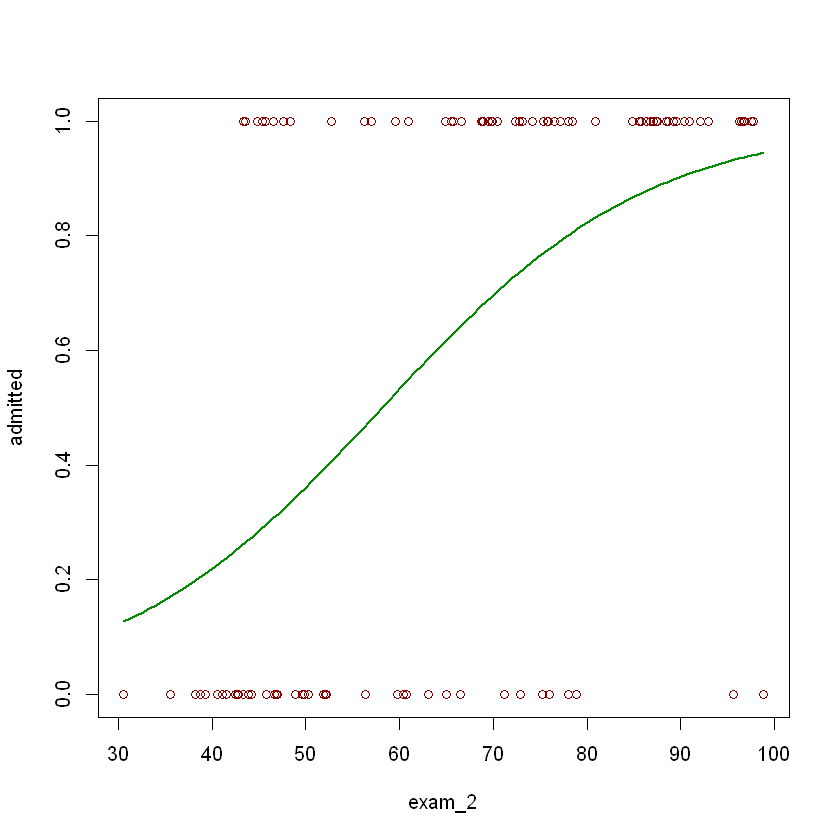

In [20]:
fit = glm(admitted ~ exam_2, data=data, family=binomial)


newdat <- data.frame(
    exam_2=seq(min(data$exam_2), max(data$exam_2),
    
               len=100))

#newdat

newdat$admitted = predict(fit, newdata=newdat, type="response")

plot(admitted ~ exam_2, data=data, col="red4")

lines(admitted ~ exam_2, newdat, col="green4", lwd=2)

exam_1,exam_2,admitted,combcol
34.62366,78.02469,0,112.64835
30.28671,43.89500,0,74.18171
35.84741,72.90220,0,108.74961
60.18260,86.30855,1,146.49115
79.03274,75.34438,1,154.37711
45.08328,56.31637,0,101.39965


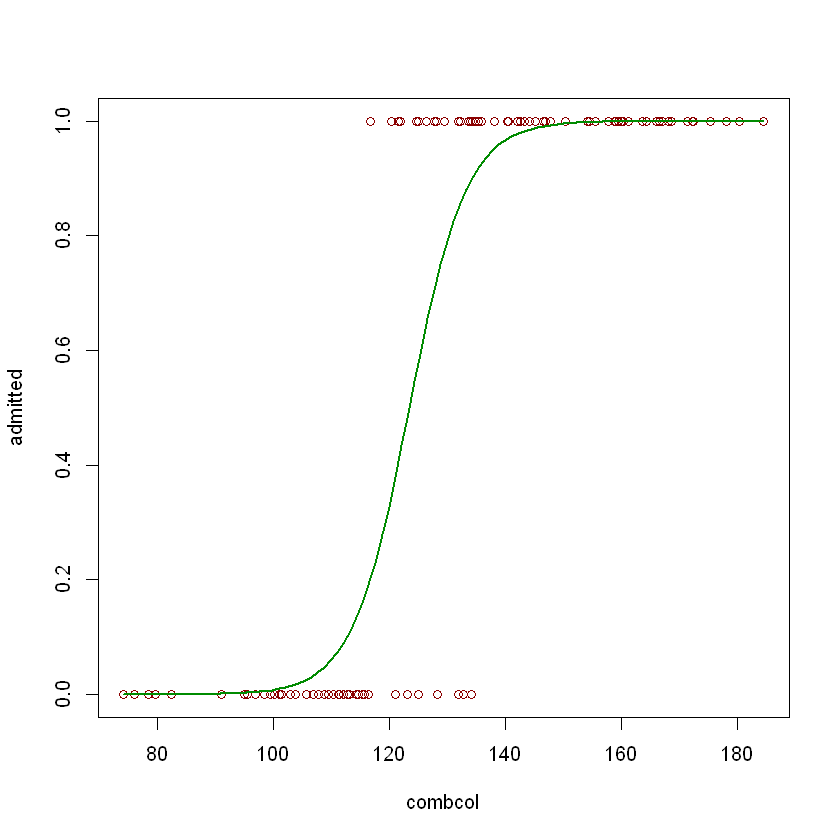

In [29]:
library("dplyr")
data <- data %>% 
  mutate(combcol = exam_1+exam_2)
head(data)

fit = glm(admitted ~ combcol, data=data, family=binomial)


newdat <- data.frame(
    combcol =seq(min(data$combcol), max(data$combcol),
    
               len=100))

#newdat

newdat$admitted = predict(fit, newdata=newdat, type="response")

plot(admitted ~ combcol, data=data, col="red4")

lines(admitted ~ combcol, newdat, col="green4", lwd=2)

In [30]:
summary(fit)


Call:
glm(formula = admitted ~ combcol, family = binomial, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.13995  -0.17844   0.01552   0.19030   1.78160  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -25.20970    5.79796  -4.348 1.37e-05 ***
combcol       0.20429    0.04677   4.368 1.26e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.602  on 99  degrees of freedom
Residual deviance:  40.738  on 98  degrees of freedom
AIC: 44.738

Number of Fisher Scoring iterations: 7


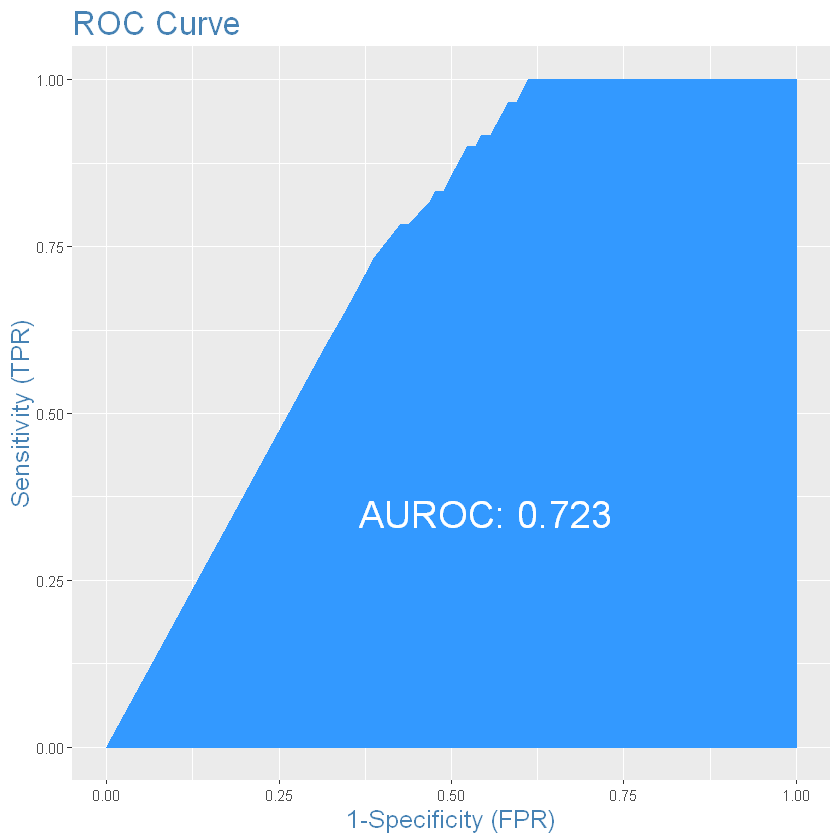

In [43]:
library(InformationValue)
predicted <- predict(fit, data, type="response")  # predicted scores
#predicted
plotROC(data, predicted)


In [44]:
sensitivity(data$admitted, predicted, threshold = 0.5)

[1] 0.9166667

In [45]:
specificity(data$admitted, predicted, threshold = 0.5)

[1] 0.875

In [46]:
Concordance(data$admitted, predicted)
# Concordance is the percentage of pairs, whose scores of actual positive’s are greater than the scores of actual negative’s. For a perfect model, 
# this will be 100%. So, the higher the concordance, the better is the quality of model.

$Concordance
[1] 0.9733333

$Discordance
[1] 0.02666667

$Tied
[1] -5.20417e-17

$Pairs
[1] 2400

In [47]:
confusionMatrix(data$admitted, predicted > 0.5)

,0,1
0,35,5
1,5,55


In [51]:
library(InformationValue)
optCutOff <- optimalCutoff(data$admitted, predicted)[1] 
optCutOff

[1] 0.1999962

In [52]:
misClassError(data$admitted, predicted, threshold = optCutOff)

[1] 0.07

In [54]:
confusionMatrix(data$admitted, predicted > 0.2)

,0,1
0,33,0
1,7,60


In [56]:
confusionMatrix(data$admitted, predicted > 0.9)

,0,1
0,40,16
1,0,44
